In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float, restoration

# Step 1

In [2]:
K_hat = {} # Save the results
for dataset in ['A02', 'A07']:
    imgs = []
    denoised_imgs = []
    for img_nbr in range(1,16): # Loop over images
        image = io.imread(f"Dataset_Lab2/{dataset}_train/{dataset}_SDR_FLAT_{img_nbr:03d}.jpg")[:1024, :1024] # Read image and crop to the same size
        grayscale = color.rgb2gray(image)
        double_precision = img_as_float(grayscale)
        denoised_image = restoration.denoise_tv_chambolle(double_precision) # Apply total variation filter

        # Compute the residuals (difference between original and denoised image)
        residuals = double_precision - denoised_image

        imgs.append(double_precision)
        denoised_imgs.append(residuals)
    
    print(f'K hat value for dataset {dataset}:')
    K_hat[dataset] = sum([i*j for i,j in zip(imgs, denoised_imgs)]) / sum([i*i for i in imgs]) # Apply formula 3 to find the final PRNU estimate
    print(K_hat[dataset])

K hat value for dataset A02:
[[ 6.27387541e-05  4.89217225e-03 -6.66216924e-04 ... -6.24974808e-03
  -3.38595269e-03  6.45554374e-05]
 [-1.22499488e-03 -3.21989823e-03 -2.54161743e-03 ... -4.92237408e-03
  -3.66512137e-03 -2.61820133e-03]
 [-4.18428467e-03 -1.11931413e-02 -6.36261279e-03 ... -2.42076913e-03
  -4.21717172e-03 -1.09627989e-02]
 ...
 [ 4.19125654e-03  6.79638018e-04 -4.33846654e-03 ... -1.76961924e-03
   3.22985533e-03  7.27533611e-03]
 [-9.47009769e-04 -2.52677552e-03 -3.21874978e-03 ...  1.52967219e-03
   6.57014869e-04  5.19210066e-03]
 [-2.58815081e-03 -1.83688764e-03  3.16301504e-03 ...  1.83718527e-04
  -1.67213327e-03  3.28537783e-03]]
K hat value for dataset A07:
[[ 1.77500314e-02  9.64208855e-03 -3.89088257e-03 ...  5.24691422e-06
   5.82603875e-03  4.27594302e-04]
 [ 1.49682025e-02  8.23683824e-03 -1.07244385e-04 ...  5.56173756e-03
   3.18966262e-03 -2.51146621e-03]
 [ 2.36534653e-03  9.69005128e-04  7.18223614e-03 ...  4.68066521e-03
  -4.27592355e-04  1.77753

# Step 2

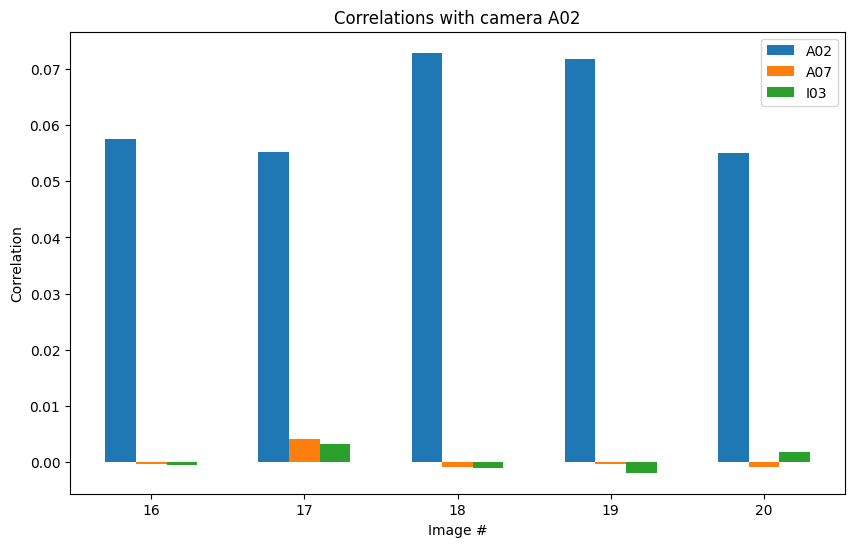

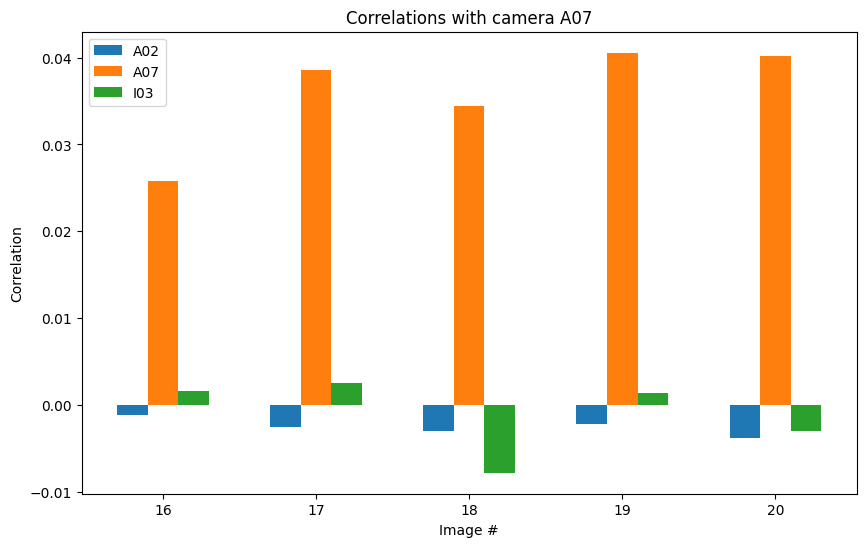

In [3]:
datasets = ['A02', 'A07', 'I03']
for test_dataset in datasets[:2]:
    correlations = [[],[],[]]
    
    for j,dataset in enumerate(datasets) :
        for i in range(16,21):
            image = io.imread(f"Dataset_Lab2/{dataset}_test/{dataset}_SDR_FLAT_{i:03d}.jpg")[:1024, :1024]
            grayscale = color.rgb2gray(image)
            double_precision = img_as_float(grayscale)
            denoised_image = restoration.denoise_tv_chambolle(double_precision)
            # Compute the residuals (difference between original and denoised image)
            residuals = double_precision - denoised_image

            # Compute correlation (formula 4)
            rho = np.corrcoef(residuals.flatten(), K_hat[test_dataset].flatten())[0, 1]
            correlations[j].append(rho)
        
    # Plot charts
    plt.figure(figsize=(10,6))

    for j in range(3):
        plt.bar(np.array(range(16,21)) + 0.2*(j-1), correlations[j], width=0.2, align='center', label=datasets[j])

    plt.title(f'Correlations with camera {test_dataset}')
    plt.xlabel('Image #')
    plt.ylabel('Correlation')
    plt.legend()
    plt.show()

# Conclusion

Photo-Response Non-Uniformity (PRNU) is a unique pattern introduced by imperfections in the imaging sensor of digital cameras. This pattern serves as a "fingerprint" that can be used to identify the source of an image. Denoising filters aim to reduce unwanted noise while preserving important details in the image. I used Total Variation denoising. This filter is edge-preserving, meaning it smooths the image while keeping edges intact. I found that this makes it particularly useful for PRNU extraction because it can smooth out noise without blurring sharp features that are important for PRNU.

As expected, in our results the correlation is high for the same camera. At the same time, correlation is near 0 with other camera and with images taken from the internet. We can conclude that the fingerprint of the camera has been correctly identified.